# Multipatch NURBS object creation

content:
* [Creation of single patch](#single)
* [Creation of multiple patch](#multiple)

In [17]:
import numpy as np

<a id='single'></a>
## 1) Create single patch

In [2]:
from pygeoiga.nurb.nurb_creation import NURB
from pygeoiga.nurb.multipatch_NURBS import Multipatch

In [3]:
cp=np.array([[[0., 100.], [0., 200.], [0., 300.]],
                       [[250., 250.], [250., 350.], [250., 400.]],
                       [[500., 100.], [500., 200.], [500., 300.]]])
knot= [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]


In [4]:
nrb = NURB(cp, knot)

In [5]:
nrb.B

array([[[  0., 100.,   1.],
        [  0., 200.,   1.],
        [  0., 300.,   1.]],

       [[250., 250.,   1.],
        [250., 350.,   1.],
        [250., 400.,   1.]],

       [[500., 100.,   1.],
        [500., 200.,   1.],
        [500., 300.,   1.]]])

In [6]:
mult = Multipatch()

In [7]:
mult.add_patch(nrb, name="mid")

In [8]:
mult.geometry

OrderedDict([('mid',
              {'B': array([[[  0., 100.,   1.],
                       [  0., 200.,   1.],
                       [  0., 300.,   1.]],
               
                      [[250., 250.,   1.],
                       [250., 350.,   1.],
                       [250., 400.,   1.]],
               
                      [[500., 100.,   1.],
                       [500., 200.,   1.],
                       [500., 300.,   1.]]]),
               'knots': [[0, 0, 0, 1, 1, 1], [0, 0, 0, 1, 1, 1]],
               'weight': array([[[1.],
                       [1.],
                       [1.]],
               
                      [[1.],
                       [1.],
                       [1.]],
               
                      [[1.],
                       [1.],
                       [1.]]]),
               'kappa': 1,
               'color': 'olivedrab',
               'position': (1, 1),
               'nrb': <pygeoiga.nurb.nurb_creation.NURB at 0x7f60ac9a9748>})]

<AxesSubplot:>

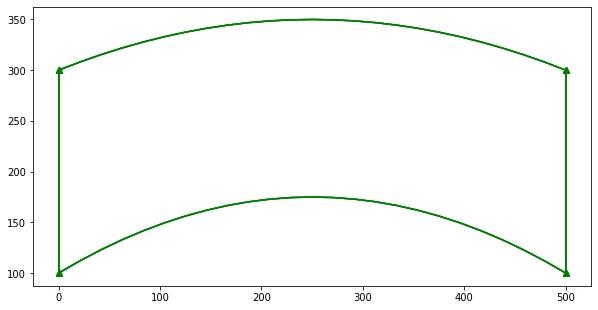

In [9]:
# Easy plotting
mult.plot_knots()

<AxesSubplot:>

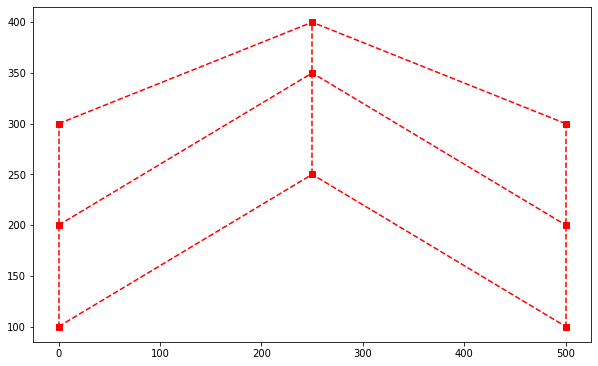

In [10]:
mult.plot_cpoints()

<AxesSubplot:>

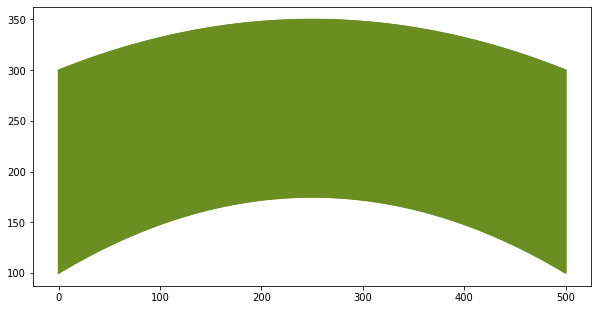

In [11]:
mult.plot_surfaces()

In [12]:
# For plotting and controling more variables use
from pygeoiga.plot.nrbplotting_mpl import p_cpoints, p_knots, p_surface, create_figure

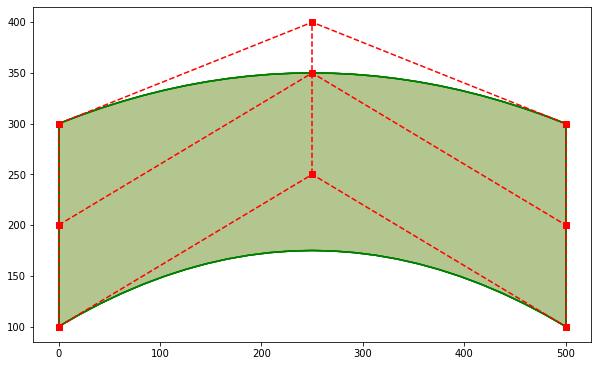

In [13]:
# Plotting
# all together
fig, ax = create_figure("2d", figsize=(10,20))
for patch_name in mult.geometry.keys():
    ax = p_surface(mult.geometry[patch_name].get("knots"), 
                   mult.geometry[patch_name].get("B"), 
                   weight=mult.geometry[patch_name].get("weight"), 
                   color=mult.geometry[patch_name].get("color"),
                   ax=ax, 
                   dim=2, 
                   alpha=0.5)
    ax = p_knots(mult.geometry[patch_name].get("knots"), mult.geometry[patch_name].get("B"), weight=mult.geometry[patch_name].get("weight"), ax=ax, dim=2,)
    ax = p_cpoints(mult.geometry[patch_name].get("B"), ax=ax, dim=2)

<a id='multiple'></a>
## 2) Create multiple patch

In [14]:
cp1 = np.array([[[0., 0.], [0.,  50.], [0., 100.]],
                [[250., 0.], [250., 180.], [250., 250.]],
                [[500.,   0.], [500.,  50.], [500., 100.]]])
knot1 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb1 = NURB(cp1, knot1)

cp2 = np.array([[[0., 300.], [0., 400.], [0., 500.]],
                        [[250., 400.], [250., 450.], [250., 500.]],
                        [[500., 300.], [500., 400.], [500., 500.]]])
knot2 = [[0, 0, 0, 1, 1, 1],[0, 0, 0, 1, 1, 1]]

nrb2 = NURB(cp2, knot2)

In [15]:
mult.add_patch(nrb1, name="bot")
mult.add_patch(nrb2, name="top")

<AxesSubplot:>

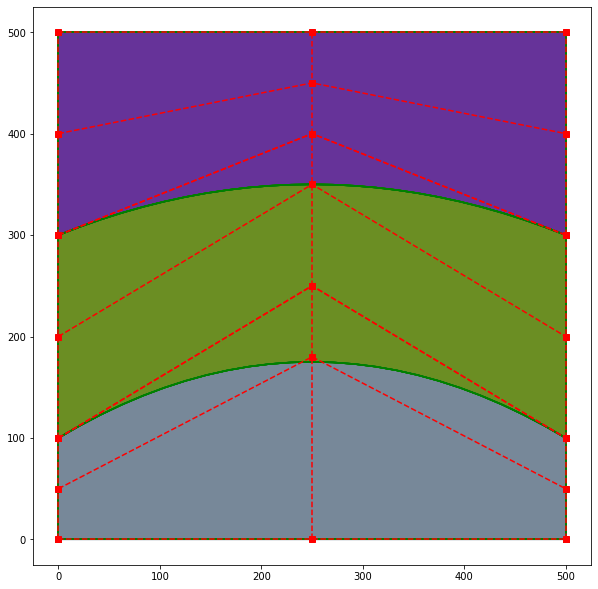

In [16]:
mult.plot()